# Intro

*Disclaimer: I am not an expert of any sort in astrophysics. These are just findings from the papers that were recommended to read and my personal observations. I apologies for any errors / mistakes in this notebook.*


In this notebook we do a quick overview of classification problem, literature overview and suggest some solutions for classification.


**What are the different events?**

Per year, [IceCube reads out roughly](https://storage.googleapis.com/kaggle-forum-message-attachments/1958559/18618/kaggle_webinar_small.pdf):
   1. 10^10 events caused by atmospheric muons
   2. 10^9 events caused by noise
   3. 100 000 events from atmospheric neutrinos
   4. A handful of very high energy events likely to be of astrophysical origin
   
   
   
The above is the split of events in the real life, however, in our Kaggle competition we have synthetic data and from what we know from the [presentation](https://storage.googleapis.com/kaggle-forum-message-attachments/1958559/18618/kaggle_webinar_small.pdf): **every event has a neutrino in them (either atmospheric or of astrophysical origin)**, some events have noise + atmospheric muons and thus are hard to reconstruct.

## We can classify the events as following:

1. Events that are easy to reconstruct (no dominating noise, atmospheric muons)
2. Events that are hard to reconstruct (a lot of noise and/or atmospheric muons)



## What do these events look like? Showers/Cascades and Tracks

Neutrino interactions in IceCube have two primary topologies:

* **Showers (or Cascades)**: When a high-energy neutrino collides with a nucleus, it produces a cascade of particles, including charged particles such as electrons and muons, as well as gamma rays and other types of radiation. These particles then continue to collide with other nuclei in the atmosphere, producing more particles and radiation in a cascading effect.
* **Secondary muon tracks**  are created when neutrinos crash into other particles. This impact causes a big explosion of even smaller particles called hadrons. In this explosion, some of the particles are muons that leave behind a special track that we can detect.

Approximately 80% of the observed events would appear as [showers](https://arxiv.org/pdf/1311.5238.pdf).


## Example of neutrino-induced particles shower

Thanks to [edguy99](https://www.kaggle.com/edguy99) for the construction of these animations. ([forum discussion](https://www.kaggle.com/competitions/icecube-neutrinos-in-deep-ice/discussion/388858))

![neutrinourl](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F67794%2F7aae4ef747964f42d82a331d8d64040a%2Fevent_333339210.gif?generation=1676956714333381&alt=media)


In here we see an example of 'cascade-like' behavior - the neutrino 'explodes' inside the detector and deposits its energy in there.

Here is an illustration from a [paper](https://arxiv.org/pdf/1311.4767.pdf):

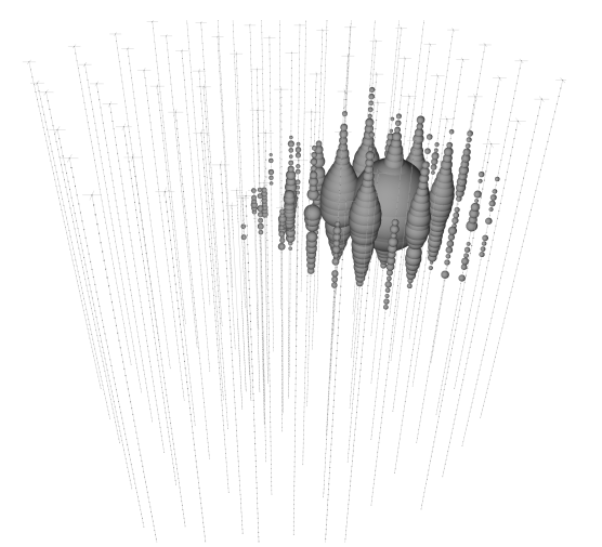


## Example of neutrino-induced muon-track


![track](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F67794%2F0a0ddfd0fdf99900db06e390ad97c547%2Fevent_509612375.gif?generation=1676956257096545&alt=media)

Here is an illustration from [paper](https://arxiv.org/pdf/1311.4767.pdf) with captions that reads that muon has started in the detector and escaped through one of the facets:
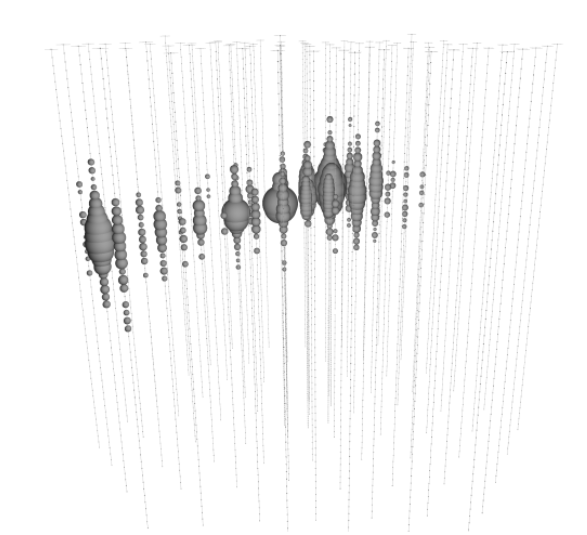

# What are hard to reconstruct events?

We know that each event has a neutrino in it, however, in some cases these neutrinos are hard to detect. We want to concentrate specifically on classifying the atmospheric muons.


Animation of hard to detect neutrinos - you can see the line of neutrinos which is kind of hard to make sense given the lightened up detectors.

![hard](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F67794%2F9f74c0fcb517044e9cb0314b262e8e88%2Fevent_2325.gif?generation=1677796378563907&alt=media)


**What do we know about atmospheric muons?**:
   * The primary mechanism for separating the cosmic ray muons from the neu156 trino muons is reconstructing the muon track and determining whether the muon was traveling downwards into the Earth or upwards out of the Earth. Because neutrinos can penetrate through the Earth but cosmic ray muons cannot, it follows that a muon traveling out of the Earth must have been generated by a neutrino. Thus, by selecting only the muons that are reconstructed as up-going,the cosmic ray muons can, in principle, be removed from the data. Because the number of cosmic ray muons overwhelms the number of neutrino muons, high accuracy is critical for preventing erroneous reconstruction of cosmic ray muons as neutrino-induced
   * Atmospheric muons can in principle be excluded by simple geometrical considerations. To exclude the contribution from downward-going atmospheric muons, it is sufficient to identify upward-going events, which can only be produced by neutrinos.
       * This distinction requires a reliable determination of the elevation angle, because downward-going atmospheric muons outnumber upward-going atmospheric neutrinos by 5 to 6 orders of magnitude for typical neutrino telescope installation depths. [Source](https://arxiv.org/abs/1105.4116)


# Literature overview: finding atmospheric muons


## Evidence for High-Energy Extraterrestrial Neutrinos at the IceCube Detector
url: https://arxiv.org/pdf/1311.5238.pdf

**Short summary**:
* The paper studied a number of high energy events and concluded that they were inconsistent with those expected from the atmospheric muon and concluded its extraterrestrial origin. 
* The main metric was the total charge (the larger charge is more likely to be extraterrestrial)
* Introducing the veto-layers (gray-out) that are used as a "filter"

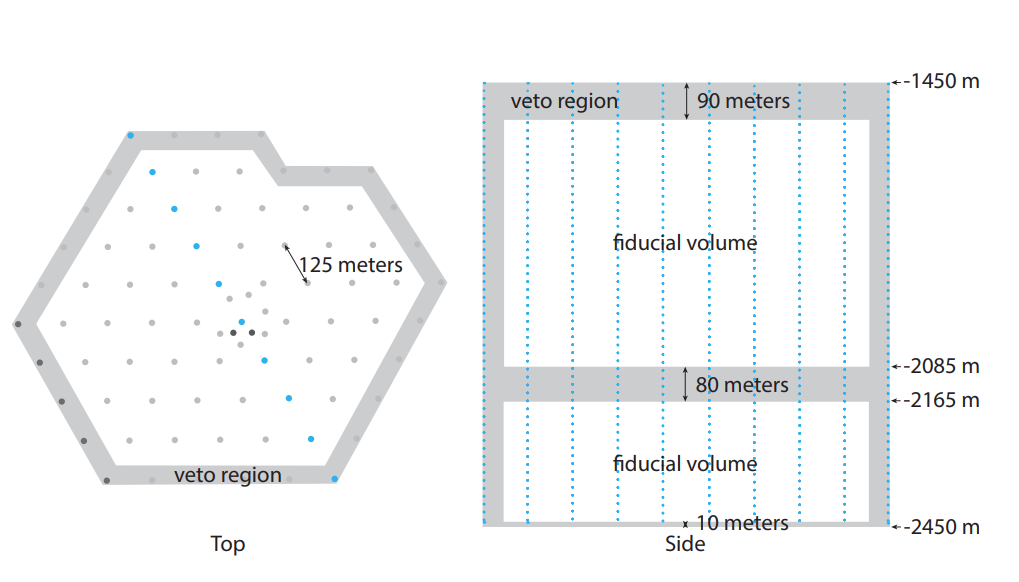

* The shaded region in the middle contains ice of high dust concentration . Because of the high degree of light absorption in this region, near horizontal events could have entered here without being tagged at the sides of the detector without a dedicated tagging region.


**Takeaways**:
* Like in the given work we can filter out atmospheric muons by restricting the region of origin of the event. Given that the muons come from above or from the sides (muons don't penetrate the earth crest)



# An algorithm for the reconstruction of neutrino-induced showers in the ANTARES neutrino telescope
url: https://arxiv.org/abs/1708.03649

**Short summary**:
* The rate at which electron neutrinos are produced in the atmosphere at the energy of interest of neutrino telescopes (1 TeV to 1000 TeV) is more than a factor of 10 less compared to atmospheric muon neutrinos.
* High-energy muons can travel straight for several kilometres through the rock and water surrounding the detector. Showers, on the other hand, deposit all their energy within a few metres from their interaction vertex.
* In this paper, an algorithm optimised for accurate reconstruction of energy and direction of shower events in the ANTARES detector is presented.

* **Several criterion chosed to classify correctly the events of 'showers', the list is below in the table:**

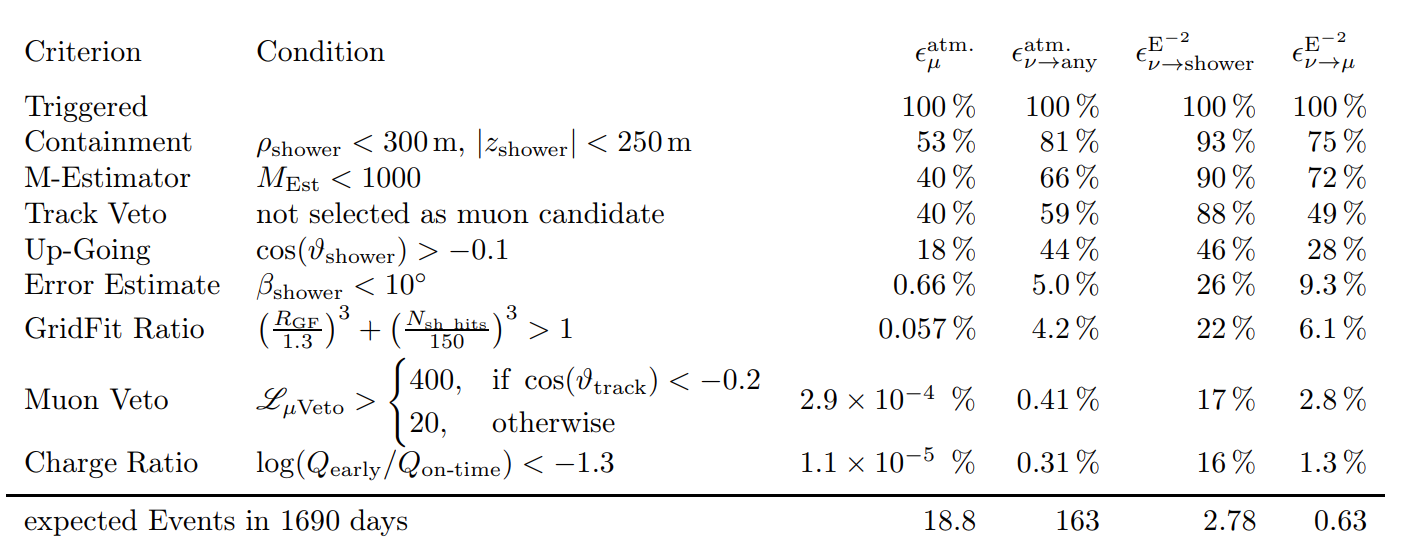

* **Interesting criterion that we can use in our study**:

**Containment + M-Estimator**:
* Reconstructing atmospheric muons with a shower algorithm often produces “shower positions” that lie far away from the detector boundary and have a large MEst value. A rough selection on position and reconstruction quality reduces the amount of background by 70 % already before the direction fit. 

**GridFit Ratio**
* The GridFit algorithm was developed for another [paper](https://www.nikhef.nl/pub/services/biblio/theses_pdf/thesis_EL_Visser.pdf). It is used here to suppress down-going muon events. In a first step, it segments the full solid angle in 500 directions. For each direction, the number of hits compatible with a muon track from this direction is determined. 
* A lower value, therefore, means a higher likelihood of this event to be a down-going muon. A selection criterion combining the GridFit ratio and the number of selected shower hits was devised to further suppress the atmospheric muon background.


**Takeaways**:
* We can see that some kind of geometrical containment is used in this paper as well (restricting the region where the event comes from / occurs)
* Another point is that they use angular restrictions to account for up-going movements of neutrinos both through angle of the shower and GridFit ratio

# Literature Overview Summary

## Classification:
* In our view it is worth to classify at least two kind of events:

1. Events that are easy to reconstruct (no dominating noise, atmospheric muons)
2. Events that are hard to reconstruct (a lot of noise and/or atmospheric muons)


Given the paper overview we would suggest to do geometrical containment classification - it both should be time efficient and easy to implement, thus:

1. **Events that are easy to reconstruct**:
    1. **Geometry**: Originated within the IceCube (cut off the boarders as per veto regions in the picture above)
    2. **Direction** Account for up-going movement (GridFit or some kind of rough approximation of angular movement could be used)
2. **Events that are hard to reconstruct**:
    1. Anything else
    
 
 
It is worth noting that energy criterion could be used to identify higher energy events that occur from neutrino coming from the space



## References:
1. [Evidence for High-Energy Extraterrestrial Neutrinos at the IceCube Detector](https://arxiv.org/pdf/1311.5238.pdf)
2. [An algorithm for the reconstruction of neutrino-induced showers in the ANTARES neutrino telescope](https://arxiv.org/abs/1708.03649)
3. [Neutrinos from the Milky Way](https://www.nikhef.nl/pub/services/biblio/theses_pdf/thesis_EL_Visser.pdf)

# Code: Classification

In [1]:
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import math

from pathlib import Path
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
PATH_INPUT = Path("/kaggle/input/icecube-neutrinos-in-deep-ice")

In [3]:
train_batch_id = 1
print('Training batch', train_batch_id)
batch_path = "train/batch_" + str(train_batch_id)+ ".parquet" 
train_batch = pl.scan_parquet(PATH_INPUT / batch_path).lazy()
df_train_meta = pl.scan_parquet(PATH_INPUT / "train_meta.parquet").lazy()
df_sensor_geometry = pl.scan_csv(PATH_INPUT / 'sensor_geometry.csv').with_columns(pl.col('sensor_id').cast(pl.Int16)).lazy()

Training batch 1


# Geometrical containment
* **In order to classify by geometrical containment we do the following identificaiton of the sensors**:
1. The edge sensors from the sides (`sides`)
2. The bottom sensors (`bottom`)
3. The top 5 sensors (`top`)

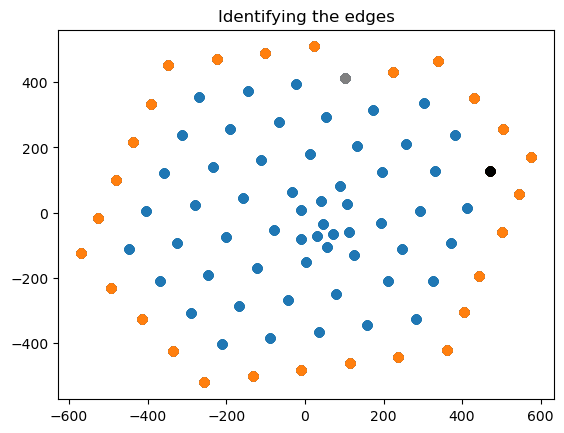

In [4]:
DISTANCE = 470

sides = df_sensor_geometry.with_columns(
[
    (((pl.col('x') ** 2 + pl.col('y') ** 2) ** 0.5)).alias('xy_distance')
]).filter(
pl.col('xy_distance') > DISTANCE).collect()

#need to delete these points
delete_points = sides.filter((pl.col('x') > 400) & (pl.col('x') < 500) & (pl.col('y') < 200) & (pl.col('y') > 0))

#need to add these points
add_points = df_sensor_geometry.filter((pl.col('x') > 100) & (pl.col('x') < 180) & (pl.col('y') > 350) & (pl.col('y') < 420)).collect()

plt.scatter(df_sensor_geometry.select([pl.col('x')]).collect(), df_sensor_geometry.select([pl.col('y')]).collect())
plt.scatter(sides.select([pl.col('x')]), sides.select([pl.col('y')]))
plt.scatter(delete_points.select(pl.col('x')), delete_points.select(pl.col('y')), c='black')
plt.scatter(add_points.select(pl.col('x')), add_points.select(pl.col('y')), c='gray')
plt.title('Identifying the edges')
plt.show()

In [5]:
delete_set = set(delete_points.select(pl.col('sensor_id')).to_pandas()['sensor_id'])
add_set = set(add_points.select(pl.col('sensor_id')).to_pandas()['sensor_id'])
sides_set = set(sides.select(pl.col('sensor_id')).to_pandas()['sensor_id'])
sides_set = (sides_set - delete_set) | add_set

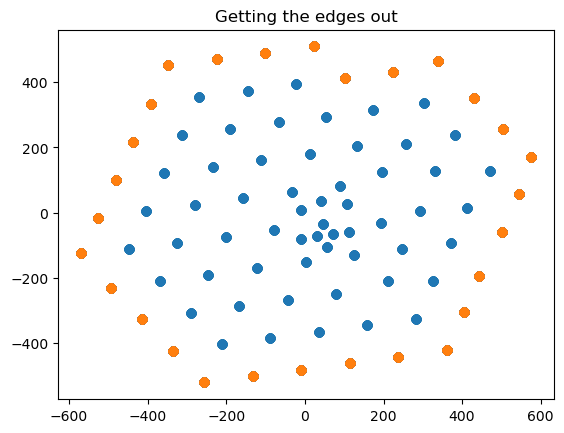

In [6]:
plt.scatter(df_sensor_geometry.select(pl.col('x')).collect(), df_sensor_geometry.select([pl.col('y')]).collect())
plt.scatter(df_sensor_geometry.filter(pl.col('sensor_id').is_in(list(sides_set))).select(pl.col('x')).collect(), df_sensor_geometry.filter(pl.col('sensor_id').is_in(list(sides_set))).select(pl.col('y')).collect())
plt.title('Getting the edges out')
plt.show()

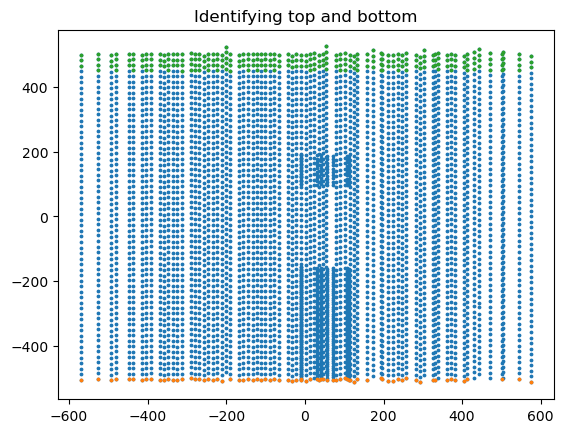

In [7]:
Z_BOTTOM = -500
Z_TOP = 450

top_sensors = df_sensor_geometry.filter(pl.col('z') > Z_TOP).collect()
bottom_sensors = df_sensor_geometry.filter(pl.col('z') < Z_BOTTOM).collect()

top_set = set(top_sensors.select(pl.col('sensor_id')).to_pandas()['sensor_id'])
bottom_set = set(bottom_sensors.select(pl.col('sensor_id')).to_pandas()['sensor_id'])

plt.scatter(df_sensor_geometry.select(pl.col('x')).collect(),df_sensor_geometry.select(pl.col('z')).collect(), marker='o', s=3)
plt.scatter(bottom_sensors.select(pl.col('x')),bottom_sensors.select(pl.col('z')), marker='o', s=3)
plt.scatter(top_sensors.select(pl.col('x')),top_sensors.select(pl.col('z')), marker='o', s=3)
plt.title('Identifying top and bottom')
plt.show()

## Analysing data using the geo containment criterion

* Let's see how many events originated within the cube

In [8]:
def add_sides(dataf, account_for_aux):
    if account_for_aux == False:
        return dataf.groupby(['event_id']).agg([
            pl.col('sensor_id').first()]
        ).with_columns([
            pl.col('sensor_id').is_in(list(sides_set)).alias('side'),
            pl.col('sensor_id').is_in(list(top_set)).alias('top'),
            pl.col('sensor_id').is_in(list(bottom_set)).alias('bottom')
        ])
    if account_for_aux == True:
          return dataf.filter(pl.col('auxiliary') == False).groupby(['event_id']).agg([
            pl.col('sensor_id').first()]
        ).with_columns([
            pl.col('sensor_id').is_in(list(sides_set)).alias('side'),
            pl.col('sensor_id').is_in(list(top_set)).alias('top'),
            pl.col('sensor_id').is_in(list(bottom_set)).alias('bottom')
        ])

In [9]:
def for_plot(dataf):
    return dataf.with_columns(
    [
        (pl.col('top').count() / pl.col('top').count()).alias('total'),
        ((pl.col('side').sum() + pl.col('top').sum() + pl.col('bottom').sum()) / pl.col('top').count()).alias('outside_events'),
        (pl.col('side').sum() / pl.col('side').count()).alias('side_ratio'),
        (pl.col('top').sum() / pl.col('top').count()).alias('top_ratio'),
        (pl.col('bottom').sum() / pl.col('top').count()).alias('bottom_ratio')
        
    ]
).head(1).select(['total','outside_events','side_ratio', 'top_ratio', 'bottom_ratio'])

In [10]:
account_for_aux = False
temp1 = train_batch.pipe(add_sides, account_for_aux
                        ).pipe(for_plot).collect().to_pandas()

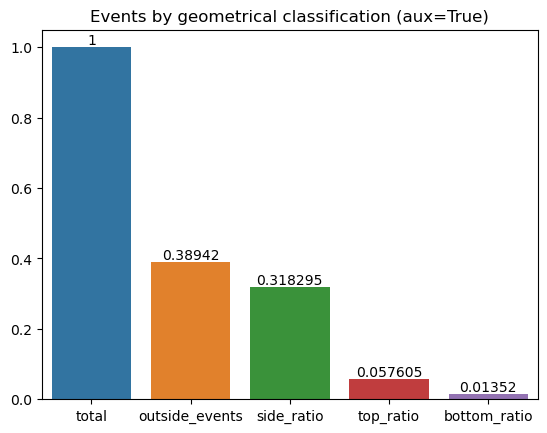

In [11]:
ax = sns.barplot(data=temp1)
ax.bar_label(ax.containers[0])
plt.title('Events by geometrical classification (aux=True)')
plt.show()

* We see that overall we have about 39% of events generated on the edges on the IceCube (not accounting for auxiliary sensors)

In [12]:
account_for_aux = True
temp1 = train_batch.pipe(add_sides, account_for_aux
                        ).pipe(for_plot).collect().to_pandas()

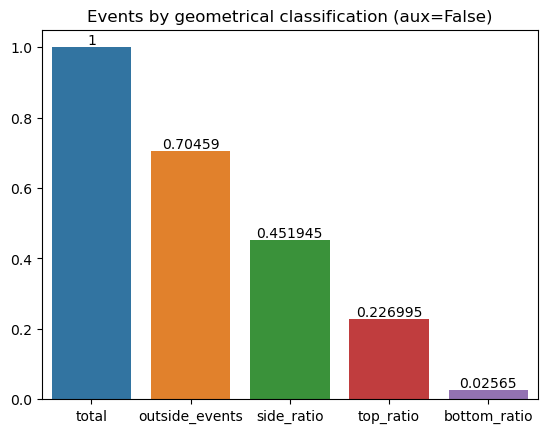

In [13]:
ax = sns.barplot(data=temp1)
ax.bar_label(ax.containers[0])
plt.title('Events by geometrical classification (aux=False)')
plt.show()

* If we account for auxiliary sensors we get to the about 70% 'hard to reconstruct' events

# Direction of movement

* We want to distinguish between 'up-going' and 'down-going' events
* The easiest way to do it is to compare the first two sensors within an event on 'z' axis.

In [14]:
def join_tables(dataf, data_geometry):
    return dataf.join(data_geometry, on='sensor_id')

In [15]:
def time_rank(dataf, account_for_aux):
    if account_for_aux == True:
        return dataf.filter(pl.col('auxiliary') == False).with_columns(
[
    pl.col('time').rank().over('event_id').alias('time_rank')
]).filter(
    pl.col('time_rank').is_in([1,1.5,2])
)
    else:
        return dataf.with_columns(
[
    pl.col('time').rank().over('event_id').alias('time_rank')
]).filter(
    pl.col('time_rank').is_in([1,1.5,2])
)

In [16]:
def add_direction(dataf):
    return dataf.groupby('event_id').agg([
    pl.col('z').head(1).alias('first'),
    pl.col('z').tail(1).alias('second')
]).with_columns(
[
    (pl.col('second').arr.explode() - pl.col('first').arr.explode()).alias('direction')
]).with_columns(
[
    (pl.col('direction') > 0).alias('upgoing'),
    (pl.col('direction') == 0).alias('horizontal'),
    (pl.col('direction') < 0).alias('downgoing')
]).select(pl.col('*').sort_by('event_id'))

In [17]:
def for_plot_direction(dataf):
    return dataf.with_columns(
    [
        (pl.col('direction').count() / pl.col('direction').count()).alias('total'),
        (pl.col('upgoing').sum() / pl.col('upgoing').count()).alias('up_ratio'),
        (pl.col('downgoing').sum() / pl.col('downgoing').count()).alias('down_ratio'),
        (pl.col('horizontal').sum() / pl.col('horizontal').count()).alias('horizontal_ratio')
        
    ]
).head(1).select(['total','down_ratio', 'horizontal_ratio', 'up_ratio'])

In [18]:
account_for_aux = False
temp_2 = train_batch.pipe(join_tables, df_sensor_geometry
                ).pipe(time_rank, account_for_aux
                ).pipe(add_direction
                ).pipe(for_plot_direction).head(1).collect().to_pandas()

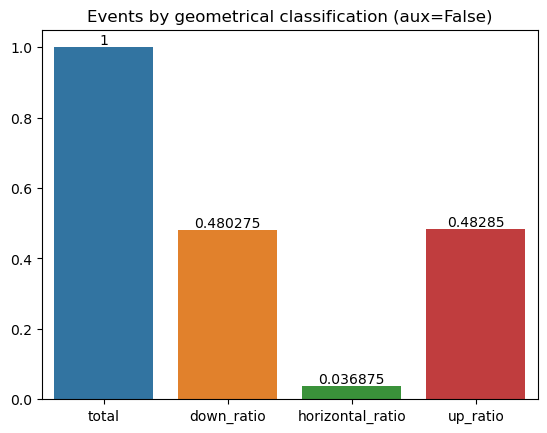

In [19]:
ax = sns.barplot(data=temp_2)
ax.bar_label(ax.containers[0])
plt.title('Events by geometrical classification (aux=False)')
plt.show()

* If we don't account for auxiliary sensors we have about equal portions of up-going and down-going events

In [20]:
account_for_aux = True
temp_2 = train_batch.pipe(join_tables, df_sensor_geometry
                ).pipe(time_rank, account_for_aux
                ).pipe(add_direction
                ).pipe(for_plot_direction).head(1).collect().to_pandas()

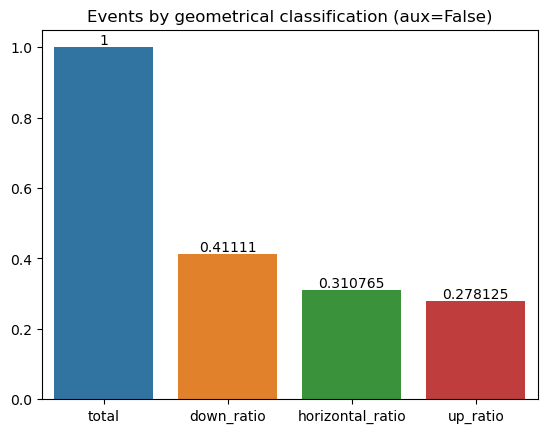

In [21]:
ax = sns.barplot(data=temp_2)
ax.bar_label(ax.containers[0])
plt.title('Events by geometrical classification (aux=False)')
plt.show()

* However, if we get rid of auxiliary sensors we see that about 40% of events are down-going, 31% horizontal and 28% up-going

# Constructing features for classification

* We want to come up with a feature that shows how good one event is for a candidate for 'easy to reconstruct' or 'hard for reconstruct'
* Idially it is a continuous variable and lets say beween 1 and 0 where 1 - 'hard to reconstruct' event and 0 - 'easy to reconstruct' event.
* We add the following weights to constuct this feature:
    * **Geo-containment**:
        * 1.0 - event originated on the top
        * 0.75 - event originated on the sides
        * 0.25 - event originated on the bottom
    * **Direction**:
        * 0.5 - down-going
        * 0.25 - horizontal
        * 0.0 - up-going
* We normalize to [0,1] and do two separate features with accounting for auxiliary sensors and not
    

In [22]:
def join_two_features(dataf, df_train_batch, account_for_aux):
    return dataf.join(df_train_batch.pipe(add_sides, account_for_aux), on='event_id')

In [23]:
def classification_feature(dataf, account_for_aux):
    if account_for_aux == True:
        return dataf.with_columns(
        [
            (pl.col('horizontal') * 0.25 + pl.col('downgoing') * 0.5 + pl.col('side') * 0.75 + pl.col('top') + pl.col('bottom') * 0.25
            ).alias('hard_to_reconstruct_aux_on')
        ]).select([
            pl.col('event_id'),
            pl.col('hard_to_reconstruct_aux_on') / pl.col('hard_to_reconstruct_aux_on').max()
        ])
    if account_for_aux == False:
        return dataf.with_columns(
        [
            (pl.col('horizontal') * 0.25 + pl.col('downgoing') * 0.5 + pl.col('side') * 0.75 + pl.col('top') + pl.col('bottom') * 0.25
            ).alias('hard_to_reconstruct_aux_off')
        ]).select([
            pl.col('event_id'),
            pl.col('hard_to_reconstruct_aux_off') / pl.col('hard_to_reconstruct_aux_off').max()
        ])

In [24]:
account_for_aux = False
temp_2 = train_batch.pipe(join_tables, df_sensor_geometry
                ).pipe(time_rank, account_for_aux
                ).pipe(add_direction
                ).pipe(join_two_features, train_batch, account_for_aux
                ).pipe(classification_feature, account_for_aux)

In [25]:
account_for_aux = True
temp_3 = train_batch.pipe(join_tables, df_sensor_geometry
                ).pipe(time_rank, account_for_aux
                ).pipe(add_direction
                ).pipe(join_two_features, train_batch, account_for_aux
                ).pipe(classification_feature, account_for_aux)

In [26]:
df_classification = temp_2.join(temp_3, on='event_id', how='left').collect().to_pandas()

In [27]:
df_classification.to_csv('classification_features.csv')

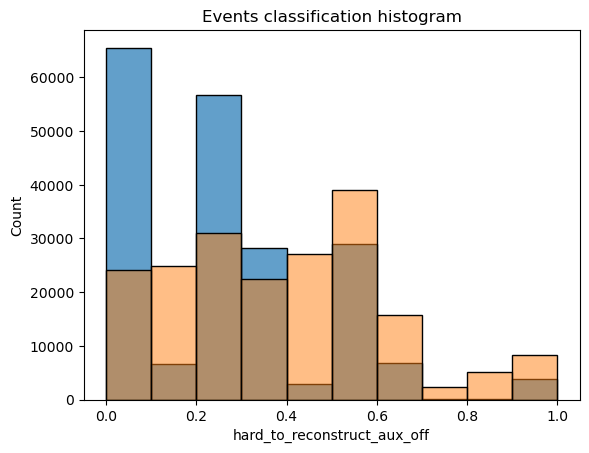

In [28]:
sns.histplot(data=df_classification['hard_to_reconstruct_aux_off'], bins=10, alpha=0.7)
sns.histplot(data=df_classification['hard_to_reconstruct_aux_on'], bins=10, alpha=0.5)
plt.title('Events classification histogram')
plt.show()

# Code for copy-paste

* For convinience here is copy-paste friendly code to generate these features to add to your notebook

In [29]:
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import math

from pathlib import Path


PATH_INPUT = Path("/kaggle/input/icecube-neutrinos-in-deep-ice")

train_batch_id = 1
print('Training batch', train_batch_id)
batch_path = "train/batch_" + str(train_batch_id)+ ".parquet" 
train_batch = pl.scan_parquet(PATH_INPUT / batch_path).lazy()
df_train_meta = pl.scan_parquet(PATH_INPUT / "train_meta.parquet").lazy()
df_sensor_geometry = pl.scan_csv(PATH_INPUT / 'sensor_geometry.csv').with_columns(pl.col('sensor_id').cast(pl.Int16)).lazy()


DISTANCE = 470

sides = df_sensor_geometry.with_columns(
[
    (((pl.col('x') ** 2 + pl.col('y') ** 2) ** 0.5)).alias('xy_distance')
]).filter(
pl.col('xy_distance') > DISTANCE).collect()

#need to delete these points
delete_points = sides.filter((pl.col('x') > 400) & (pl.col('x') < 500) & (pl.col('y') < 200) & (pl.col('y') > 0))

#need to add these points
add_points = df_sensor_geometry.filter((pl.col('x') > 100) & (pl.col('x') < 180) & (pl.col('y') > 350) & (pl.col('y') < 420)).collect()

delete_set = set(delete_points.select(pl.col('sensor_id')).to_pandas()['sensor_id'])
add_set = set(add_points.select(pl.col('sensor_id')).to_pandas()['sensor_id'])
sides_set = set(sides.select(pl.col('sensor_id')).to_pandas()['sensor_id'])
sides_set = (sides_set - delete_set) | add_set


Z_BOTTOM = -500
Z_TOP = 450

top_sensors = df_sensor_geometry.filter(pl.col('z') > Z_TOP).collect()
bottom_sensors = df_sensor_geometry.filter(pl.col('z') < Z_BOTTOM).collect()

top_set = set(top_sensors.select(pl.col('sensor_id')).to_pandas()['sensor_id'])
bottom_set = set(bottom_sensors.select(pl.col('sensor_id')).to_pandas()['sensor_id'])


def add_sides(dataf, account_for_aux):
    if account_for_aux == False:
        return dataf.groupby(['event_id']).agg([
            pl.col('sensor_id').first()]
        ).with_columns([
            pl.col('sensor_id').is_in(list(sides_set)).alias('side'),
            pl.col('sensor_id').is_in(list(top_set)).alias('top'),
            pl.col('sensor_id').is_in(list(bottom_set)).alias('bottom')
        ])
    if account_for_aux == True:
          return dataf.filter(pl.col('auxiliary') == False).groupby(['event_id']).agg([
            pl.col('sensor_id').first()]
        ).with_columns([
            pl.col('sensor_id').is_in(list(sides_set)).alias('side'),
            pl.col('sensor_id').is_in(list(top_set)).alias('top'),
            pl.col('sensor_id').is_in(list(bottom_set)).alias('bottom')
        ])
        
def join_tables(dataf, data_geometry):
    return dataf.join(data_geometry, on='sensor_id')

def time_rank(dataf, account_for_aux):
    if account_for_aux == True:
        return dataf.filter(pl.col('auxiliary') == False).with_columns(
[
    pl.col('time').rank('ordinal').over('event_id').alias('time_rank')
]).filter(
    pl.col('time_rank').is_in([1,2])
)
    else:
        return dataf.with_columns(
[
    pl.col('time').rank('ordinal').over('event_id').alias('time_rank')
]).filter(
    pl.col('time_rank').is_in([1,2])
)
    
    
def add_direction(dataf):
    return dataf.groupby('event_id').agg([
    pl.col('z').head(1).alias('first'),
    pl.col('z').tail(1).alias('second')
]).with_columns(
[
    (pl.col('second').arr.explode() - pl.col('first').arr.explode()).alias('direction')
]).with_columns(
[
    (pl.col('direction') > 0).alias('upgoing'),
    (pl.col('direction') == 0).alias('horizontal'),
    (pl.col('direction') < 0).alias('downgoing')
]).select(pl.col('*').sort_by('event_id'))


def join_two_features(dataf, df_train_batch, account_for_aux):
    return dataf.join(df_train_batch.pipe(add_sides, account_for_aux), on='event_id')


def classification_feature(dataf, account_for_aux):
    if account_for_aux == True:
        return dataf.with_columns(
        [
            (pl.col('horizontal') * 0.25 + pl.col('downgoing') * 0.5 + pl.col('side') * 0.75 + pl.col('top') + pl.col('bottom') * 0.25
            ).alias('hard_to_reconstruct_aux_on')
        ]).select([
            pl.col('event_id'),
            pl.col('hard_to_reconstruct_aux_on') / pl.col('hard_to_reconstruct_aux_on').max()
        ])
    if account_for_aux == False:
        return dataf.with_columns(
        [
            (pl.col('horizontal') * 0.25 + pl.col('downgoing') * 0.5 + pl.col('side') * 0.75 + pl.col('top') + pl.col('bottom') * 0.25
            ).alias('hard_to_reconstruct_aux_off')
        ]).select([
            pl.col('event_id'),
            pl.col('hard_to_reconstruct_aux_off') / pl.col('hard_to_reconstruct_aux_off').max()
        ])
    
account_for_aux = False
temp_2 = train_batch.pipe(join_tables, df_sensor_geometry
                ).pipe(time_rank, account_for_aux
                ).pipe(add_direction
                ).pipe(join_two_features, train_batch, account_for_aux
                ).pipe(classification_feature, account_for_aux)


account_for_aux = True
temp_3 = train_batch.pipe(join_tables, df_sensor_geometry
                ).pipe(time_rank, account_for_aux
                ).pipe(add_direction
                ).pipe(join_two_features, train_batch, account_for_aux
                ).pipe(classification_feature, account_for_aux)

df_classification = temp_2.join(temp_3, on='event_id', how='left').collect().to_pandas()

df_classification.to_csv('classification_features.csv')

df_classification

Training batch 1


,event_id,hard_to_reconstruct_aux_off,hard_to_reconstruct_aux_on
0,330628,0.222222,0.444444
1,1301964,0.666667,0.666667
2,1569872,0.333333,0.000000
3,1063628,0.222222,0.222222
4,3199660,0.000000,0.444444
...,...,...,...
199995,1369361,0.111111,0.000000
199996,1754245,0.111111,0.222222
199997,1047985,0.333333,0.222222
199998,997297,0.000000,0.555556
